## Phase 1.10

# Webscraping

## DOM & HTML

> *Web pages can be represented by the objects that comprise their structure and content. This representation is known as the Document Object Model (DOM). The purpose of the DOM is to provide an interface for programs to change the structure, style, and content of web pages. The DOM represents the document as nodes and objects. Amongst other things, this allows programming languages to interactively change the page and HTML!*
>
> *What you'll see is the DOM and HTML create a hierarchy of elements. This structure and the underlying elements can be navigated similarly to a family tree which is one of Beautiful Soup's main mechanisms for navigation. Once you select a specific element within a page, you can then navigate to successive elements using methods to retrieve related tags including a tag's sibling, parent or descendants.*
>
> *To learn more about the DOM see:*
> *https://developer.mozilla.org/en-US/docs/Web/API/Document_Object_Model/Introduction*

## Beautiful Soup

> *https://www.crummy.com/software/BeautifulSoup/bs4/doc/*
>
> *Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.*


### ***Precaution***

> *While web scraping is a powerful tool, it can also lead you into ethical and legal gray areas.*
> - *To start, it is possible to make hundreds of requests a second to a website.*
>     - *Browsing at superhuman speeds such as this is apt to get noticed. Large volumes of requests such as this are apt to bog down a website's servers and in extreme cases could be considered a denial of service attack.* 
> - *Similarly, any website requiring login may contain information that is thereby not considered public and scraping said websites could leave you in legal jeopardy.* 
>
> *Use your best judgment when scraping and exercise precautions. Having your IP address blocked from your favorite website, for example, could prove to be quite an annoyance.*

In [1]:
import requests
import os
import time

from bs4 import BeautifulSoup
import pandas as pd

In [2]:
for i in range(3):
    time.sleep(3)
    print('Hi!')

Hi!
Hi!
Hi!


### *Pandas Hack - `pd.read_html()`*
*Occasionally, there will be a webpage where the information you want is already formatted in a `<table>` in the html. In those cases, Pandas can retrieve the data directly from the URL.*

*When used in this way, Pandas returns a list of dataframes that are extracted from tables from the webpage.*

In [4]:
SUMMER_OLYMPICS = 'https://en.wikipedia.org/wiki/Athletics_at_the_1924_Summer_Olympics_%E2%80%93_Men%27s_javelin_throw'
df_lst = pd.read_html(SUMMER_OLYMPICS)
for df in df_lst:
    display(df)

,Men's javelin throwat the Games of the VIII Olympiad,Men's javelin throwat the Games of the VIII Olympiad.1,Unnamed: 2
0,Venue,Stade Olympique Yves-du-Manoir,NaN
1,Date,July 6,NaN
2,Competitors,29 from 15 nations,NaN
3,Medalists,Medalists,NaN
4,Jonni Myyrä Finland Gunnar Lindström Sweden Eu...,Jonni Myyrä Finland Gunnar Lindström Sweden Eu...,NaN
5,NaN,NaN,Jonni Myyrä Finland
6,NaN,NaN,Gunnar Lindström Sweden
7,NaN,NaN,Eugene Oberst United States
8,← 19201928 →,← 19201928 →,NaN


,0,1,2
0,NaN,NaN,Jonni Myyrä Finland
1,NaN,NaN,Gunnar Lindström Sweden
2,NaN,NaN,Eugene Oberst United States


,Athletics at the1924 Summer Olympics,Athletics at the1924 Summer Olympics.1
0,NaN,NaN
1,Track events,Track events
2,100 m,men
3,200 m,men
4,400 m,men
5,800 m,men
6,1500 m,men
7,5000 m,men
8,"10,000 m",men
9,110 m hurdles,men


,0,1,2,3,4
0,World Record,66.10,Jonni Myyrä,Stockholm (SWE),"August 25, 1919"
1,Olympic Record,65.78,Jonni Myyrä,Antwerp (BEL),"August 15, 1920"


,Place,Athlete,1.,2.,3.,Distance,Overall Rank,Qual.
0,1,Gunnar Lindström (SWE),~59,~58,60.81,60.81,1.0,Q
1,2,Jonni Myyrä (FIN),X (~52),59.30,~56,59.30,2.0,Q
2,3,Eugene Oberst (USA),NaN,~53,57.98,57.98,3.0,Q
3,4,Yrjö Ekqvist (FIN),NaN,~56,56.15,56.15,5.0,Q
4,5,Lajos Csejthey (HUN),NaN,54.86,NaN,54.86,9.0,NaN
5,6,Lee Priester (USA),54.51,~52,NaN,54.51,11.0,NaN
6,7,Hugo Lilliér (SWE),52.95,~51,~45,52.95,13.0,NaN
7,8,Georgios Zacharopoulos (GRE),51.17,51.17,51.17,51.17,15.0,NaN
8,9,Willy Seewald (BRA),49.39,49.39,49.39,49.39,18.0,NaN
9,10,Taki N'Dio (FRA),48.92,48.92,48.92,48.92,19.0,NaN


,Place,Athlete,1.,2.,3.,Distance,Overall Rank,Qual.
0,1,William Neufeld (USA),NaN,56.96,NaN,56.96,4,Q
1,2,Erik Blomqvist (SWE),X (~54),~56,56.15,56.15,5,Q
2,3,Urho Peltonen (FIN),X (~56),X (~56),55.67,55.67,7,NaN
3,4,Pekka Johansson (FIN),55.10,NaN,NaN,55.10,8,NaN
4,5,Taka Gangué (FRA),54.65,54.65,54.65,54.65,10,NaN
5,6,Homer Welchel (USA),52.98,52.98,52.98,52.98,12,NaN
6,7,Carlo Clemente (ITA),52.75,52.75,52.75,52.75,14,NaN
7,8,Arvīds Ķibilds (LAT),50.15,50.15,50.15,50.15,16,NaN
8,9,Aleksander Klumberg (EST),~50,~50,49.61,49.61,17,NaN
9,10,Hans Wipf (SUI),48.57,48.57,48.57,48.57,21,NaN


,Place,Athlete,Qual. Width,1.,2.,3.,Distance
0,1,Jonni Myyrä (FIN),59.30,~60,62.96,~58,62.96
1,2,Gunnar Lindström (SWE),60.81,~60,60.92,NaN,60.92
2,3,Eugene Oberst (USA),57.98,NaN,NaN,NaN,57.98
3,4,Yrjö Ekqvist (FIN),56.15,57.56,NaN,NaN,57.56
4,5,William Neufeld (USA),56.96,NaN,NaN,NaN,56.96
5,6,Erik Blomqvist (SWE),56.15,NaN,NaN,NaN,56.15


,vteJavelin throw at the Olympic Games,vteJavelin throw at the Olympic Games.1
0,Summary,Summary
1,Men,1908 1912 1920 1924 1928 1932 1936 1948 1952 1...
2,Women,1908 1912 1920 1924 1928 1932 1936 1948 1952 1...
3,See also: 1908 Men's freestyle javelin throw •...,See also: 1908 Men's freestyle javelin throw •...


# Using Beautiful Soup

*It's always a good idea to explore the website with:*
- *`Right-Click > Inspect` ...*

> <a href='https://books.toscrape.com/index.html'>*books.toscrape.com*</a>

In [5]:
URL = 'https://books.toscrape.com/catalogue/page-1.html'

In [7]:
# Demo of `os.path.split()`. This may come in handy later...
os.path.split(URL)

('https://books.toscrape.com/catalogue', 'page-1.html')

In [8]:
# Use requests to get the page.
r = requests.get(URL)
r.ok

True

In [9]:
r.content

b'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:30" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon"

In [10]:
# Make soup.
soup = BeautifulSoup(r.content)
soup

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:30" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="

# Practice
Our goal is to extract data from this site. We want **a dataframe containing columns: `Title, Stars, Price, In Stock`**.

---

In order to do this successfully, we need to break this process up into steps which we will put together at the end.

***Steps***
1. ***Scrape a Single Page***
    1. **Capture a single book as a data point.**
        - Find how book entries are represented on the site.
            - *Using `Inspect` in the browser.*
        - Using an example entry, create a function that returns the data in a formatted way for us to use.
            - *The book should be thought of as an entry in the dataframe.* 
            - *How should we encode a row?*
        - **Write this in a function.**
    2. **Capture all books on a given page.**
        - Use the above function to extract *all* the data from a given page.
        - **Write this in a function.**


2. ***Scrape Multiple Pages***
    1. **Find a way to traverse the pages.**
        - Rather than hard-coding the url *(which is a reasonable option, but not best-practice)*, we should use the webpage itself to find the url we want to travel to next.
        - *What is the "gotchya" that we have to avoid for our code to avoid breaking?*
        > ***Write a practice script that goes through each page and prints the url or title.***
        > 
        > *Add a short pause between requests using `time.sleep()`.*
    
2. ***Scrape All Data from All Pages***
    > **Write a function that takes a URL and returns a dataframe.**
    >
    > ```python
    > def scrape_books_toscrape(
    >         url='https://books.toscrape.com/catalogue/page-1.html', 
    >         verbose=True):
    >     """
    >     Returns a pandas dataframe with the scraped data from books.toscrape.com
    >     """
    >     
    >     return
    > ```

## Step 1

### 1a. Capture a single book as a data point.

In [17]:
all_articles = soup.find_all('article', class_='product_pod')
len(all_articles)

20

In [20]:
test_book = all_articles[0]
test_book

<article class="product_pod">
<div class="image_container">
<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [41]:
# Title
test_book.find('h3').find('a')['title']

'A Light in the Attic'

In [46]:
# Stars
test_book.find('p')['class'][-1]

'Three'

In [54]:
# Price
test_book.find('p', class_='price_color').text

'£51.77'

In [64]:
# In Stock
test_book.find('p', class_='instock availability').text.strip()

'In stock'

### 1b. Capture all books on a given page.

In [65]:
# Define functions to extract each element from the pods.
# - Name
def get_title(book_pod):
    return book_pod.find('h3').find('a')['title']

# - Stars
def get_stars(book_pod):
    return book_pod.find('p')['class'][-1]

# - Price
def get_price(book_pod):
    return book_pod.find('p', class_='price_color').text

# - Instock
def get_instock(book_pod):
    return book_pod.find('p', class_='instock availability').text.strip()

In [80]:
my_data = []

for book in all_articles:
    title = get_title(book)
    stars = get_stars(book)
    price = get_price(book)
    instock = get_instock(book)
    my_data.append((title, stars, price, instock))

df = pd.DataFrame(my_data, columns=['Name', 'Stars', 'Price', 'In-Stock'])
df

,Name,Stars,Price,In-Stock
0,A Light in the Attic,Three,£51.77,In stock
1,Tipping the Velvet,One,£53.74,In stock
2,Soumission,One,£50.10,In stock
3,Sharp Objects,Four,£47.82,In stock
4,Sapiens: A Brief History of Humankind,Five,£54.23,In stock
5,The Requiem Red,One,£22.65,In stock
6,The Dirty Little Secrets of Getting Your Dream...,Four,£33.34,In stock
7,The Coming Woman: A Novel Based on the Life of...,Three,£17.93,In stock
8,The Boys in the Boat: Nine Americans and Their...,Four,£22.60,In stock
9,The Black Maria,One,£52.15,In stock


In [86]:
# Process the price: change to float.
def clean_price(price):
    new_s = ''
    for character in price:
        if character in {'0','1','2','3','4','5','6','7','8','9','.'}:
            new_s += character
    return new_s
    
    
df['Price'] = df['Price'].apply(clean_price).astype(float) #.apply(lambda price: price[1:])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      20 non-null     object 
 1   Stars     20 non-null     object 
 2   Price     20 non-null     float64
 3   In-Stock  20 non-null     object 
dtypes: float64(1), object(3)
memory usage: 768.0+ bytes


<AxesSubplot:>

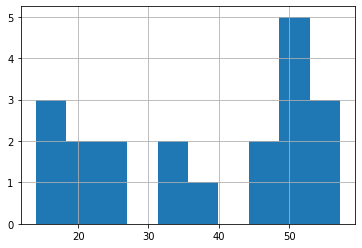

In [87]:
df['Price'].hist()

# Quick look at Function vs Method vs Attribute

In [91]:
class Vi:
    def __init__(self):
        self.height = 'short'
        
    def get_title(self):
        return 'My title is queen of the universe!!'

In [94]:
v = Vi()
v.height # Attribute

'short'

In [93]:
v.get_title() # Method

'My title is queen of the universe!!'

## Step 2

### 2a. Find a way to traverse the pages.

## Step 3

### 3a. Write a function that takes a URL and returns a dataframe.

In [ ]:
def scrape_books_toscrape(
        url='https://books.toscrape.com/catalogue/page-1.html', 
        verbose=True):
    """
    Returns a pandas dataframe with the scraped data from books.toscrape.com
    """

    return

# Further Scraping Tools
- <a href='https://www.selenium.dev/'>*Selenium*</a>
- <a href='https://scrapy.org/'>*Scrapy*</a>